In [1]:
#Counteor for the number of errors in the grid
import os
from os.path import join
path = os.getcwd()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pydoc import ispath
import pandas as pd
import h5py
import numpy as np

parent = os.path.abspath("..")
DBS = join(parent,"results","databases")



In [3]:

# Change this accordingly
CONFIGS = ["night_charging","prognosis", "random", "solar_charging", "max_p"]
for CONFIG in CONFIGS:
    RESULTS_DIR = "C:\\Repos\\Simulation_Results\\results_March_smart_charging_EV_only"
    RESULTS_DB_DIR = RESULTS_DIR #join(RESULTS_DIR, "databases")
    GRID_SNAPS_DIR = join(RESULTS_DIR, "grid_snapshots")
    RESULTS_POSTPROC_DIR = join(RESULTS_DIR, "postprocessed")
    scenarios = ["EV"]

    counter = {}
    counter_total = {}
    min_v_dict={}
    no_cars_list=[]
    for scenario in scenarios:
        counter[scenario]=[]
        counter_total[scenario]={}
        issues_list_by_car = []
        min_v_list = []

        for n_cars in range(49,500):
        # search if folder exists
            DB_NAME = join(RESULTS_DB_DIR,f"Results_{scenario}_{n_cars}_{CONFIG}.hdf5")
            if os.path.isfile(DB_NAME):
                print("doing")
                if scenario =="EV":
                    no_cars_list.append(n_cars)
                data = h5py.File(DB_NAME, "r")
        
                series = {}

                # Which datarows do I want
                series["bus"] = [b for b in data["Series"].keys() if "bus" in b.lower()]
                if scenario == "GRID_OBSV":
                    series["bus"] = [b for b in data["Series"].keys() if "gridnode" in b.lower()]
                results = {}
                params = {}
                output_list=[]
                column_names = series["bus"]
                par = "vm_pu"
                for column in column_names:
                    output = data["Series"][column][par]
                    output = np.array(output)
                    output_list.append(output)
                    results[column.split("-")[-1]] = np.array(output)

                df = pd.DataFrame(results)

                #count how many values outside of the boundaries I have...
                min_v = 1
                violations= 0
                for col in df.columns:
                    for x in df[col]:
                        if x<0.95:
                            violations+=1
                        if x<min_v:
                            min_v = x
                min_v_list.append(min_v)



                list_issues = []
                list_issues_serious = []
                for idx in df.index:
                    issue = 0 
                    voltages = [df.at[idx,c] for c in df.columns]
                    if min(voltages)<0.95:
                        issue=1
                    list_issues.append(issue)
                    
                    serious_issue= 0
                    if min(voltages)<0.90:
                        serious_issue=1
                    list_issues_serious.append(serious_issue)


                issues_statistic=[]
                issues_count =[]
                # there are 96 values per day
                # a maximum of 96*7/20
                max_allowed = int(round(96*7/20))
                for i, issue in enumerate(list_issues):
                    problem = 0

                    if i<=96*7:
                        sublist = list_issues[0:i+1]
                    else:
                        sublist = list_issues[i+1-96*7:i+1]
                        assert(len(sublist)==96*7)
                    week_issues = sublist.count(1)
                    issues_count.append(week_issues)
                    if week_issues >=max_allowed:
                        problem = 1
                    
                    if list_issues_serious[i]==1:
                        problem = 1


                    issues_statistic.append(problem)
                issues_statistic_count=issues_statistic.count(1)
                issues_list_by_car.append(issues_statistic_count)
                counter_total[scenario][n_cars]=issues_count




        counter[scenario]=issues_list_by_car
        min_v_dict[scenario] = min_v_list
    counter["n_cars"] = no_cars_list
    min_v_dict["n_cars"] = no_cars_list


    import json
    with open(f"figs220918\\only_EV_car_results_{CONFIG}.json", "w") as write_file:
        json.dump(counter, write_file, indent=4)

    with open(f"figs220918\\only_EV_car_results_totals_{CONFIG}.json", "w") as write_file:
        json.dump(counter_total, write_file, indent=4)

    with open(f"figs220918\\only_EV_car_results_min_v_{CONFIG}.json", "w") as write_file:
        json.dump(min_v_dict, write_file, indent=4)



doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing
doing


In [8]:
import json
CONFIGS = ["max_p","night_charging","prognosis", "solar_charging"]
min_v_df_results = []
for CONFIG in CONFIGS:
    with open(f"figs220918\\only_EV_car_results_min_v_{CONFIG}.json") as json_file:
        min_v_dict = json.load(json_file)

    min_v_df = pd.DataFrame.from_dict(min_v_dict)
    min_v_df.set_index("n_cars", inplace=True)
    min_v_df.columns = [x + " - "+CONFIG for x in min_v_df.columns]
    min_v_df_results.append(min_v_df)

min_res =  pd.concat(min_v_df_results, axis=1)
min_res.rename(columns ={"EV - max_p":"EV - max. power"},inplace=True)
min_res

EV - max. power  EV - night_charging  EV - prognosis  \
n_cars                                                         
49             0.966544                  NaN        0.973663   
75             0.957663                  NaN        0.966943   
98             0.956607                  NaN        0.966552   
115            0.945981                  NaN        0.963430   
130            0.945703                  NaN        0.963108   
147            0.939463                  NaN        0.957375   
160            0.931912                  NaN        0.952000   
175            0.928990                  NaN        0.950438   
185            0.928990                  NaN        0.950411   
196            0.928651                  NaN        0.950288   
215            0.923098                  NaN        0.947965   
230            0.921645                  NaN        0.947373   
245            0.920297             0.924221        0.946454   
260            0.906064             0.915078        0.941649   
275            0.904203             0.913617        0.940793   
280            0.903718             0.913493        0.940793   
294            0.902793             0.912736        0.940235   
301            0.894717             0.904859        0.934091   
308            0.890052             0.900558        0.931654   
315            0.889653             0.900130        0.931205   
322            0.889014             0.899653        0.931006   
329            0.888430             0.899220        0.930720   
336            0.888003             0.898782        0.930420   
343            0.886823             0.897659        0.929689   
350            0.863068             0.875164        0.917535   
357            0.859536             0.872808        0.916368   
364            0.856499             0.869930        0.915097   
371            0.854430             0.868004        0.913935   
378            0.853352             0.867566        0.913742   
385            0.852133             0.866649        0.913255   

        EV - solar_charging  
n_cars                       
49                 0.974029  
75                 0.969394  
98                 0.969394  
115                0.969394  
130                0.969394  
147                0.969394  
160                0.966827  
175                0.966827  
185                0.966827  
196                0.966579  
215                0.965589  
230                0.965589  
245                0.965142  
260                0.965142  
275                0.964626  
280                0.964092  
294                0.963833  
301                0.961463  
308                0.961463  
315                0.961463  
322                0.961463  
329                0.961463  
336                0.961463  
343                0.961463  
350                0.961463  
357                0.960146  
364                0.960146  
371                0.960146  
378                0.959306  
385                0.959017

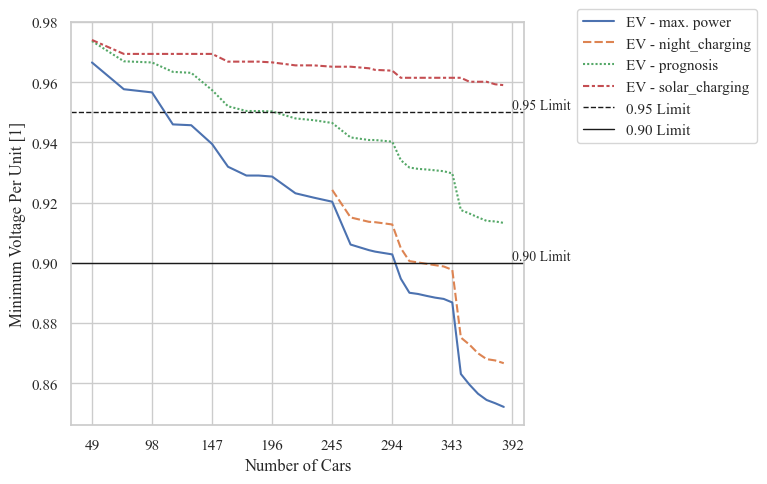

In [9]:
sns.set(font = "Times New Roman", style ="whitegrid")

fig,ax = plt.subplots(figsize=(8,5))

graph=sns.lineplot(data=min_res,ax=ax, )
ax.set_xlabel("Number of Cars")
ax.set_ylabel("Minimum Voltage Per Unit [1]")
#ax.set_title("Minimum Voltage Levels for Different\nCharging Strategies, Scenario EV",fontweight="bold")
graph.set_xticks([49*x for x in range(1,9)])

graph.axhline(0.95, label = "0.95 Limit",color='k',ls='--',linewidth=1)
graph.axhline(0.90, label = "0.90 Limit",color='k',linewidth=1)
ax.annotate("0.95 Limit", xy=(392, 0.951), size=10)
ax.annotate("0.90 Limit", xy=(392, 0.901), size=10)
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()
fig.savefig("figs220919\\min_voltage_smart_charging_only_EV.png", dpi= 600)

In [10]:

import json
CONFIGS = ["max_p","night_charging","prognosis", "solar_charging"]
min_v_df_results = []
for CONFIG in CONFIGS:
    with open(f"figs\\only_EV_car_results_{CONFIG}.json") as json_file:
        counter = json.load(json_file)

    counter_df = pd.DataFrame.from_dict(counter)
    counter_df.set_index("n_cars", inplace=True)
    counter_df.columns = [x + " - "+CONFIG for x in counter_df.columns]
    min_v_df_results.append(counter_df)

counter_df =  pd.concat(min_v_df_results, axis=1)
counter_df.rename(columns ={"EV - max_p":"EV - max. power"},inplace=True)

counter_df


EV - max. power  EV - night_charging  EV - prognosis  \
n_cars                                                         
49                    0                  NaN               0   
75                    0                  NaN               0   
98                    0                  NaN               0   
115                   0                  NaN               0   
130                   0                  NaN               0   
147                   0                  NaN               0   
160                   0                  NaN               0   
175                   0                  NaN               0   
185                   0                  NaN               0   
196                   0                  NaN               0   
215                   0                  NaN               0   
230                   0                  NaN               0   
245                   0                  0.0               0   
260                 192                  0.0               0   
275                 194                  0.0               0   
280                 196                  0.0               0   
294                 271                  0.0               0   
301                1324                262.0               0   
308                1647                411.0               0   
315                1648                473.0               0   
322                1651                474.0               0   
329                1720                475.0               0   
336                1888                537.0               0   
343                1908                668.0               0   
350                2127               1595.0               0   
357                2164               1616.0               0   
364                2169               1638.0               0   
371                2227               1638.0               0   
378                2228               1638.0               0   
385                2228               1638.0               0   

        EV - solar_charging  
n_cars                       
49                        0  
75                        0  
98                        0  
115                       0  
130                       0  
147                       0  
160                       0  
175                       0  
185                       0  
196                       0  
215                       0  
230                       0  
245                       0  
260                       0  
275                       0  
280                       0  
294                       0  
301                       0  
308                       0  
315                       0  
322                       0  
329                       0  
336                       0  
343                       0  
350                       0  
357                       0  
364                       0  
371                       0  
378                       0  
385                       0

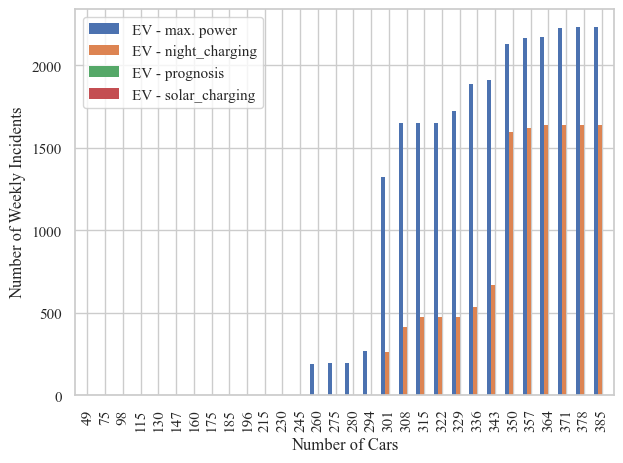

In [11]:
fig,ax = plt.subplots()

    
counter_df.plot.bar(ax=ax,linewidth=0, width = 0.9)
sns.set(font = "Times New Roman", style ="whitegrid")

ax.set_xlabel("Number of Cars")
ax.set_ylabel("Number of Weekly Incidents")
#ax.set_title("Weekly Voltage Issues for Different Charging Strategies",fontweight="bold")

plt.tight_layout()
fig.savefig("figs220919\\weeky_voltage_issues_bar_only_EV.png", dpi= 600)